### Objective:
Uber Technologies, Inc. is an American multinational transportation network company based in San Francisco and has operations in over 785 metropolitan areas with over 110 million users worldwide. As a newly hired Data Scientist in Uber's New York Office, you have been given the task of extracting actionable insights from data that will help in the growth of the the business. 

### Key Questions:
1. What are the different variables that influence the number of pickups?
2. Which factor affects the number of pickups the most? What could be the possible reasons for that?
3. What are your recommendations to Uber management to capitalize on fluctuating demand?

### Data Description:
The data contains the details for the Uber rides across various boroughs (subdivisions) of New York City at an hourly level and attributes associated with weather conditions at that time.

* `pickup_dt`: Date and time of the pick-up
* `borough`: NYC's borough
* `pickups`: Number of pickups for the period (hourly)
* `spd`: Wind speed in miles/hour
* `vsb`: Visibility in miles to the nearest tenth
* `temp`: Temperature in Fahrenheit
* `dewp`: Dew point in Fahrenheit
* `slp`: Sea level pressure
* `pcp01`: 1-hour liquid precipitation
* `pcp06`: 6-hour liquid precipitation
* `pcp24`: 24-hour liquid precipitation
* `sd`: Snow depth in inches
* `hday`: Being a holiday (Y) or not (N)

### Importing the necessary libraries

In [1]:
# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

### Loading the dataset

In [2]:
data = pd.read_csv('data/9_uber_data.csv')

In [3]:
# copying data to another variable to avoid any changes to original data
df = data.copy()

### Data Overview

In [4]:
# looking at head (5 observations) 
df.sample(6)

,pickup_dt,borough,pickups,spd,vsb,temp,dewp,slp,pcp01,pcp06,pcp24,sd,hday
8394,22-02-2015 20:00,Brooklyn,683,0.0,9.1,43.0,28.0,1020.3,0.0,0.0,0.0000,11.500000,N
1468,10-01-2015 07:00,Queens,119,8.0,10.0,22.0,1.0,1024.6,0.0,0.0,0.0555,0.083333,N
18993,30-04-2015 01:00,Bronx,36,9.0,10.0,54.0,40.0,1005.6,0.0,0.0,0.0500,0.000000,N
3623,23-01-2015 22:00,Staten Island,3,6.0,10.0,38.0,21.0,1019.4,0.0,0.0,0.0000,0.000000,N
18443,26-04-2015 14:00,Staten Island,2,9.0,10.0,54.0,28.0,1006.0,0.0,0.0,0.0000,0.000000,N
2365,15-01-2015 23:00,Staten Island,0,5.0,10.0,33.0,16.0,1015.4,0.0,0.0,0.0000,0.000000,N


- *The `pickup_dt` column contains the date and time of pickup* 
- *The `borough` column contains the name of the New York borough in which the pickup was made*
- *The `pickups` column contains the number of pickups in the borough at the given time* 
- *Starting from `spd` to `sd`, all the columns are related to weather and  are numerical in nature*
- *The `hday` column indicates whether the day of the pickup is a holiday or not (Y: Holiday, N: Not a holiday)*

In [5]:
# looking at the shape of the data

df.shape

(29101, 13)

- *The dataset has 29,101 rows and 13 columns*

In [6]:
df.info() # checking the data types and non-null counts

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29101 entries, 0 to 29100
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pickup_dt  29101 non-null  object 
 1   borough    26058 non-null  object 
 2   pickups    29101 non-null  int64  
 3   spd        29101 non-null  float64
 4   vsb        29101 non-null  float64
 5   temp       28742 non-null  float64
 6   dewp       29101 non-null  float64
 7   slp        29101 non-null  float64
 8   pcp01      29101 non-null  float64
 9   pcp06      29101 non-null  float64
 10  pcp24      29101 non-null  float64
 11  sd         29101 non-null  float64
 12  hday       29101 non-null  object 
dtypes: float64(9), int64(1), object(3)
memory usage: 2.9+ MB


- *All the columns have 29,101 observations except `borough` and `temp` which has 26058 and 28742 observations indicating that there are some missing values in them*
- *The `pickup_dt` column is being read as a 'object' data type but it should be in date-time format*
- *The `borough` and `hday` columns are of object type while the rest of the columns are numerical in nature*
- *The object type columns contain categories in them*

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
pickups,29101.0,490.215903,995.649536,0.0,1.0,54.0,449.000000,7883.00
spd,29101.0,5.984924,3.699007,0.0,3.0,6.0,8.000000,21.00
vsb,29101.0,8.818125,2.442897,0.0,9.1,10.0,10.000000,10.00
temp,28742.0,47.900019,19.798783,2.0,32.0,46.5,65.000000,89.00
dewp,29101.0,30.823065,21.283444,-16.0,14.0,30.0,50.000000,73.00
slp,29101.0,1017.817938,7.768796,991.4,1012.5,1018.2,1022.900000,1043.40
pcp01,29101.0,0.003830,0.018933,0.0,0.0,0.0,0.000000,0.28
pcp06,29101.0,0.026129,0.093125,0.0,0.0,0.0,0.000000,1.24
pcp24,29101.0,0.090464,0.219402,0.0,0.0,0.0,0.050000,2.10
sd,29101.0,2.529169,4.520325,0.0,0.0,0.0,2.958333,19.00


- *There is a huge difference between the 3rd quartile and the maximum value for the number of pickups (`pickups`) and snow depth (`sd`) indicating that there might be outliers to the right in these variables*
- *The temperature has a wide range indicating that data consists of entries for different seasons*

**Let's check the count of each unique category in each of the categorical/object type variables.**

In [8]:
df['borough'].value_counts(normalize=True) * 100

borough
Bronx            16.666667
Brooklyn         16.666667
EWR              16.666667
Manhattan        16.666667
Queens           16.666667
Staten Island    16.666667
Name: proportion, dtype: float64

- *We can observe that there are 5 unique boroughs present in the dataset for New York plus EWR (Newark Liberty Airport)*

    - *Valid NYC Boroughs (Bronx, Brooklyn, Manhattan, Queens, and Staten Island)*
    - *EWR is the acronym for Newark Liberty Airport (EWR IS NOT AN NYC BOROUGH)* 
        - *NYC customers have the flexibility to catch flights to either: (1) JFK Airport, LaGuardia Airport, or Newark Liberty Airport (EWR)*. 

In [9]:
df['hday'].value_counts(normalize=True) * 100

hday
N    96.147899
Y     3.852101
Name: proportion, dtype: float64

- *The number of non-holiday observations is much more than holiday observations which make sense*
-*Around 96% of the observations are from non-holidays*


We have observed earlier that the data type for `pickup_dt` is object in nature. Let us change the data type of `pickup_dt` to date-time format.

In [10]:
# fixing the date format for pickup_dt

df['pickup_dt'] = pd.to_datetime(df['pickup_dt'], format="%d-%m-%Y %H:%M")

Let's check the data types of the columns again to ensure that the change has been executed properly.

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29101 entries, 0 to 29100
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   pickup_dt  29101 non-null  datetime64[ns]
 1   borough    26058 non-null  object        
 2   pickups    29101 non-null  int64         
 3   spd        29101 non-null  float64       
 4   vsb        29101 non-null  float64       
 5   temp       28742 non-null  float64       
 6   dewp       29101 non-null  float64       
 7   slp        29101 non-null  float64       
 8   pcp01      29101 non-null  float64       
 9   pcp06      29101 non-null  float64       
 10  pcp24      29101 non-null  float64       
 11  sd         29101 non-null  float64       
 12  hday       29101 non-null  object        
dtypes: datetime64[ns](1), float64(9), int64(1), object(2)
memory usage: 2.9+ MB


- *The data type of the `pickup_dt` column has been succesfully changed to date-time format*
- *There are now 10 numerical columns, 2 object type columns and 1 date-time column*

Checking the time period for which the data has been collected.

In [12]:
print("Min: ",df['pickup_dt'].min()) # this will display the date from which data observations have been started
print("Max: ",df['pickup_dt'].max()) # this will display the last date of the dataset

Min:  2015-01-01 01:00:00
Max:  2015-06-30 23:00:00


- *So the time period for the data is from Janunary to June for the year 2015*
- *There is a significant difference in the weather conditions in this period which we have observed from our statistical summary for various weather parameters such as temperature ranging from 2F to 89F*

Since the `pickup_dt` column contains the combined information in the form of date, month, year and time of the day, let's extract each piece of information as a separate entity to get the trend of rides varying over time.


#### Extracting date parts from pickup date

In [13]:
# Extracting date parts from pickup date
df['YEAR'] = df.pickup_dt.dt.year # extracting the year from the date
df['MONTH'] = df.pickup_dt.dt.month_name() # extracting the month name from the date
df['HOUR'] = df.pickup_dt.dt.hour # extracting the hour from the time
df['DAY'] = df.pickup_dt.dt.day # extracting the day from the date
df['WEEKDAY'] = df.pickup_dt.dt.day_name() # extracting the day of the week from the date

In [14]:
df.sample(5)

,pickup_dt,borough,pickups,spd,vsb,temp,dewp,slp,pcp01,pcp06,pcp24,sd,hday,YEAR,MONTH,HOUR,DAY,WEEKDAY
2983,2015-01-19 21:00:00,Bronx,32,10.0,10.0,41.0,20.0,1009.5,0.0,0.0,1.503833,0.0,Y,2015,January,21,19,Monday
2374,2015-01-16 01:00:00,Bronx,17,9.0,10.0,33.0,16.0,1014.9,0.0,0.0,0.000000,0.0,N,2015,January,1,16,Friday
16995,2015-04-17 15:00:00,Bronx,78,7.5,9.1,59.5,53.0,1017.5,0.0,0.0,0.000000,0.0,N,2015,April,15,17,Friday
19927,2015-05-05 19:00:00,Staten Island,0,0.0,10.0,84.0,53.0,1021.5,0.0,0.0,0.000000,0.0,N,2015,May,19,5,Tuesday
2518,2015-01-16 22:00:00,Manhattan,3967,15.0,10.0,33.0,11.0,1014.0,0.0,0.0,0.000000,0.0,N,2015,January,22,16,Friday


Now we can remove the `pickup_dt` column from our dataset as it will not be required for further analysis.

In [15]:
# removing the pickup date column 
df.drop('pickup_dt',axis=1,inplace=True)

Let's check the first few rows of the dataset to see if changes have been applied properly

In [16]:
df.head()

,borough,pickups,spd,vsb,temp,dewp,slp,pcp01,pcp06,pcp24,sd,hday,YEAR,MONTH,HOUR,DAY,WEEKDAY
0,Bronx,152,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0,Y,2015,January,1,1,Thursday
1,Brooklyn,1519,5.0,10.0,NaN,7.0,1023.5,0.0,0.0,0.0,0.0,Y,2015,January,1,1,Thursday
2,EWR,0,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0,Y,2015,January,1,1,Thursday
3,Manhattan,5258,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0,Y,2015,January,1,1,Thursday
4,Queens,405,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0,Y,2015,January,1,1,Thursday


Let's analyze the statistical summary for the new columns added in the dataset.

In [17]:
df.describe(include='all').T 

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
borough,26058,6,Bronx,4343,NaN,NaN,NaN,NaN,NaN,NaN,NaN
pickups,29101.0,NaN,NaN,NaN,490.215903,995.649536,0.0,1.0,54.0,449.0,7883.0
spd,29101.0,NaN,NaN,NaN,5.984924,3.699007,0.0,3.0,6.0,8.0,21.0
vsb,29101.0,NaN,NaN,NaN,8.818125,2.442897,0.0,9.1,10.0,10.0,10.0
temp,28742.0,NaN,NaN,NaN,47.900019,19.798783,2.0,32.0,46.5,65.0,89.0
dewp,29101.0,NaN,NaN,NaN,30.823065,21.283444,-16.0,14.0,30.0,50.0,73.0
slp,29101.0,NaN,NaN,NaN,1017.817938,7.768796,991.4,1012.5,1018.2,1022.9,1043.4
pcp01,29101.0,NaN,NaN,NaN,0.00383,0.018933,0.0,0.0,0.0,0.0,0.28
pcp06,29101.0,NaN,NaN,NaN,0.026129,0.093125,0.0,0.0,0.0,0.0,1.24
pcp24,29101.0,NaN,NaN,NaN,0.090464,0.219402,0.0,0.0,0.0,0.05,2.1


- *The collected data is from the year 2015* 
- *It consists of data for 6 unique months*

### Missing value treatment

One of the commonly used method to deal with the missing values is to impute them with the central tendencies - mean, median, and mode of a column.

* `Replacing with mean`: In this method the missing values are imputed with the mean of the column. Mean gets impacted by the presence of outliers, and in such cases where the column has outliers using this method may lead to erroneous imputations. 

* `Replacing with median`: In this method the missing values are imputed with the median of the column. In cases where the column has outliers, median is an appropriate measure of central tendency to deal with the missing values over mean.

* `Replacing with mode`: In this method the missing values are imputed with the mode of the column. This method is generally preferred with categorical data.

In [18]:
def missing_value_summary(df):
    """
    Returns a DataFrame with the count and percentage of missing values for each column in df, sorted by percentage descending.
    Args:
        df (pd.DataFrame): Input DataFrame.
    Returns:
        pd.DataFrame: DataFrame with columns ['Missing Count', 'Missing %'].
    """
    missing_count = df.isnull().sum()
    missing_percent = (missing_count / df.shape[0]) * 100
    missing_summary = pd.DataFrame({'Missing Count': missing_count, 'Missing %': missing_percent})
    missing_summary = missing_summary[missing_summary['Missing Count'] > 0].sort_values('Missing %', ascending=False)
    return missing_summary

In [19]:
# checking missing values across each columns
missing_value_summary(df)

,Missing Count,Missing %
borough,3043,10.456685
temp,359,1.233635


- *The variable `borough` and `temp ` have 3043 and 359 missing values in them*
- *There are no missing values in other variables*

Let us first see the missing value of the `borough` column in detail.

In [20]:
# Checking the missing values further
df.borough.value_counts(normalize=True, dropna=False) # dropna=False includes NaN values in the count

borough
Bronx            0.149239
Brooklyn         0.149239
EWR              0.149239
Manhattan        0.149239
Queens           0.149239
Staten Island    0.149239
NaN              0.104567
Name: proportion, dtype: float64

- *All the 6 categories have the same percentage i.e. ~15%. There is no mode (or multiple modes) for this variable*
- *The percentage of missing values is close to the percentage of observations from other boroughs*
- *We can treat the missing values as a separate category for this variable*

We can replace the null values present in the `borough` column with a new label as `Unknown`.

In [21]:
# Replacing NaN with Unknown
df['borough'].fillna('Unknown', inplace =True) 

In [22]:
df['borough'].value_counts()

borough
Bronx            4343
Brooklyn         4343
EWR              4343
Manhattan        4343
Queens           4343
Staten Island    4343
Unknown          3043
Name: count, dtype: int64

*It can be observed that the new label `Unknown` has been added in the `borough` column*

In [23]:
# checking missing values across each columns
missing_value_summary(df)

,Missing Count,Missing %
temp,359,1.233635


Since this is a numerical variable, so we can impute the missing values by mean or median but before imputation, let's analyze the `temp` variable in detail. 

Let us print the rows where the `temp` variable is having missing values.

In [24]:
df.loc[df['temp'].isnull()==True]

,borough,pickups,spd,vsb,temp,dewp,slp,pcp01,pcp06,pcp24,sd,hday,YEAR,MONTH,HOUR,DAY,WEEKDAY
1,Brooklyn,1519,5.0,10.0,NaN,7.0,1023.5,0.0,0.0,0.0,0.0,Y,2015,January,1,1,Thursday
8,Brooklyn,1229,3.0,10.0,NaN,6.0,1023.0,0.0,0.0,0.0,0.0,Y,2015,January,2,1,Thursday
15,Brooklyn,1601,5.0,10.0,NaN,8.0,1022.3,0.0,0.0,0.0,0.0,Y,2015,January,3,1,Thursday
22,Brooklyn,1390,5.0,10.0,NaN,9.0,1022.0,0.0,0.0,0.0,0.0,Y,2015,January,4,1,Thursday
29,Brooklyn,759,5.0,10.0,NaN,9.0,1021.8,0.0,0.0,0.0,0.0,Y,2015,January,5,1,Thursday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2334,Brooklyn,594,5.0,10.0,NaN,13.0,1016.2,0.0,0.0,0.0,0.0,N,2015,January,19,15,Thursday
2340,Brooklyn,620,5.0,10.0,NaN,13.0,1015.5,0.0,0.0,0.0,0.0,N,2015,January,20,15,Thursday
2347,Brooklyn,607,3.0,10.0,NaN,14.0,1015.4,0.0,0.0,0.0,0.0,N,2015,January,21,15,Thursday
2354,Brooklyn,648,9.0,10.0,NaN,14.0,1015.4,0.0,0.0,0.0,0.0,N,2015,January,22,15,Thursday


*There are 359 observations where `temp` variable has missing values. From the overview of the dataset, it seems as if the missing temperature values are from the Brooklyn borough in the month of January.* 

So let's confirm our hypothesis by printing the unique boroughs and month names present for these missing values.

In [25]:
df.loc[df['temp'].isnull()==True,'borough'].value_counts()

borough
Brooklyn    359
Name: count, dtype: int64

In [26]:
df.loc[df['temp'].isnull()==True,'MONTH'].value_counts()

MONTH
January    359
Name: count, dtype: int64

*The missing values in `temp` are from the Brooklyn borough and they are from the month of January.* 

Let's check on which the date for the month of  January, missing values are present.

In [27]:
df.loc[df['temp'].isnull()==True,'DAY'].unique() # days for which missing values are present

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15],
      dtype=int32)

In [28]:
df.loc[df['MONTH']=='January', 'DAY'].unique() # unique days in the month of January

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31],
      dtype=int32)

*It can be observed  that out of the 31 days in January, the data is missing for the first 15 days.*

Since from the statistical summary, the mean and median values of temperature are close to each other, hence we can impute the missing values in the `temp` column by taking the mean tempertaure of the Brooklyn borough during 16th to 31st January.

We will use fillna() function to impute the missing values.

**fillna() -** The fillna() function is used to fill NaN values by using the provided input value.

       Syntax of fillna():  data['column'].fillna(value = x)


In [29]:
df['temp'] = df['temp'].fillna(value=df.loc[df['borough'] == 'Brooklyn','temp'].mean())

In [30]:
# checking missing values across each columns
missing_value_summary(df)

,Missing Count,Missing %


- *All the missing values have been imputed and there are no missing values in our dataset now*.

Let's now perform the Exploratory Data Analysis on the dataset

### Exploratory Data Analysis

### Univariate Analysis

Let us first explore the numerical variables.

In [31]:

# Function to create a histogram and boxplot combined for visualization of numerical features
def histogram_boxplot(data, feature, figsize=(10, 5)):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (10,5))
    
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize)  # creating the 2 subplots
    
    sns.boxplot(data=data, x=feature, ax=ax_box2, showmeans=True, color="lightgreen")  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(data=data, x=feature, kde=True, ax=ax_hist2, color='skyblue')  # For histogram
    
    ax_hist2.axvline(data[feature].mean(), color="green", linestyle="--")  # Add mean to the histogram
    ax_hist2.axvline(data[feature].median(), color="black", linestyle="-")  # Add median to the histogram

`pickups`

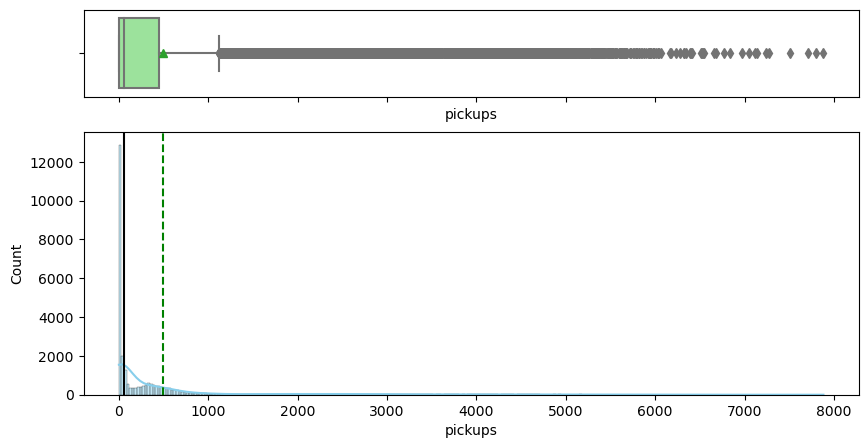

In [32]:
histogram_boxplot(df,'pickups')

- *The distribution of pickups is highly right skewed and have too many outliers*
- *While mostly the number of pickups are at a lower end, we have observations where the number of pickups went as high as 8000*

`vsb` Visibility in miles to the nearest tenth

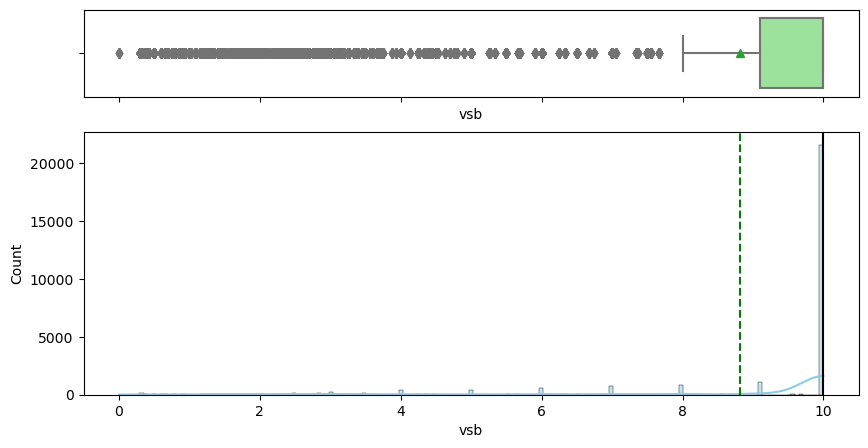

In [33]:
histogram_boxplot(df,'vsb')

- *The `visibility` column is is left-skewed*
- *Both the mean and median are high, indicating that the visibility is good on most days*
- *There are, however, outliers towards the left, indicating that visibility is extremely low on some days*
- *It will be interesting to see how visibility affects the Uber pickup frequency*

`temp` Temperature in Fahrenheit

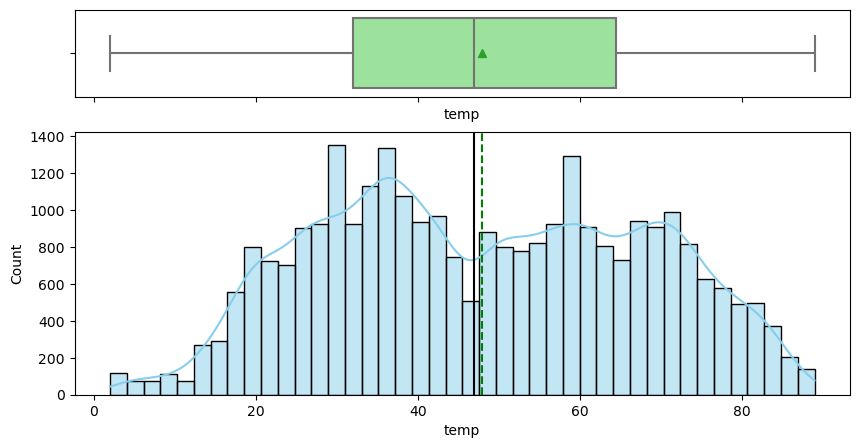

In [34]:
histogram_boxplot(df,'temp')

- *Temperature does not have any outliers*
- *50% of the temperature values are less than 45F (~7 degree celcius), indicating cold weather conditions*

`dewp` Dew point in Fahrenheit

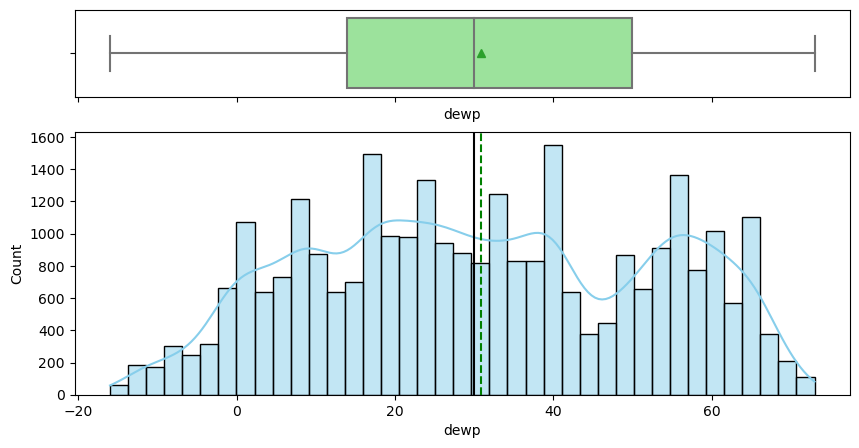

In [35]:
histogram_boxplot(df,'dewp')

- *There are no outliers for dew point either*
- *The distribution is similar to that of temperature. It suggests possible correlation between the two variables*
- *Dew point is an indication of humidity, which is correlated with temperature*

`slp` Sea level pressure

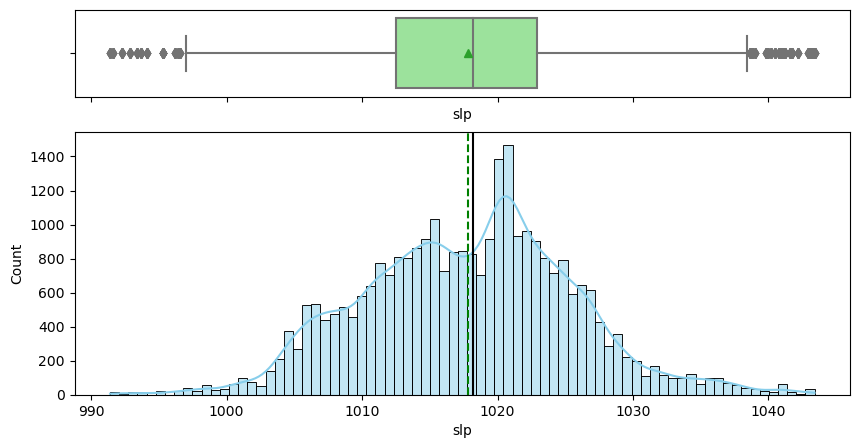

In [36]:
histogram_boxplot(df,'slp')

- *Sea level pressure distribution is close to normal*
- *There are a few outliers on both the ends*

`pcp01` 1-hour liquid precipitation

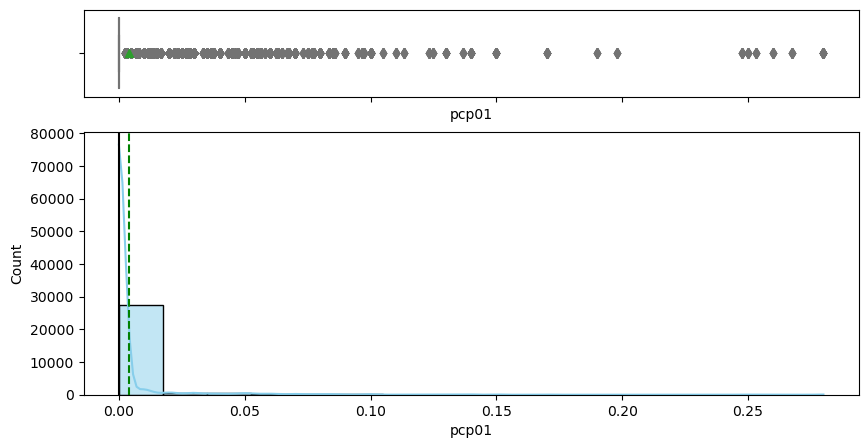

In [37]:
histogram_boxplot(df,'pcp01')

`pcp06` 6 hour liquid precipitation

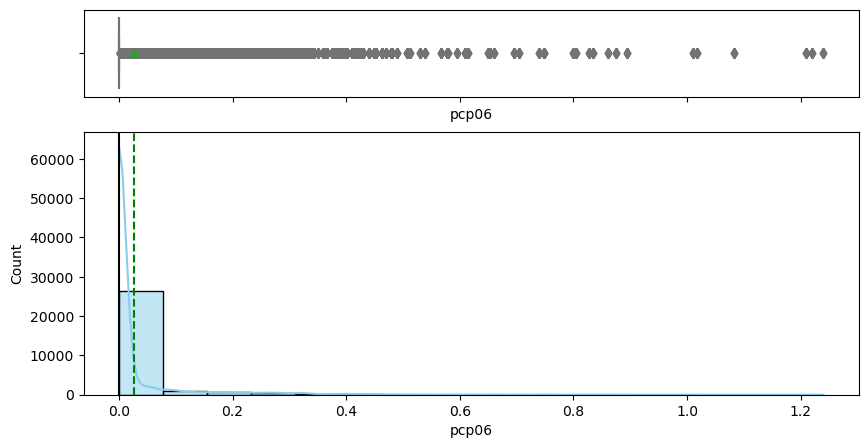

In [38]:
histogram_boxplot(df,'pcp06')

`pcp24` 24 hour liquid precipitation

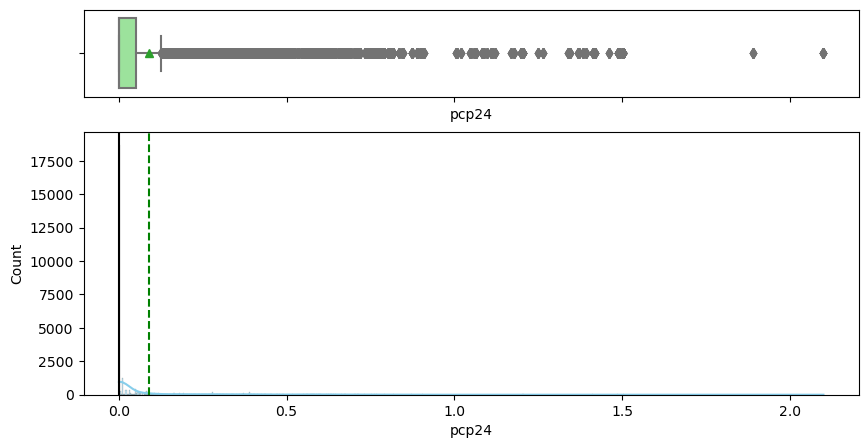

In [39]:
histogram_boxplot(df,'pcp24')

- *It rains on relatively fewer days in New York*
- *Most of the days are dry*
- *The outliers occur when it rains heavily*

`sd` Snow Depth in inches

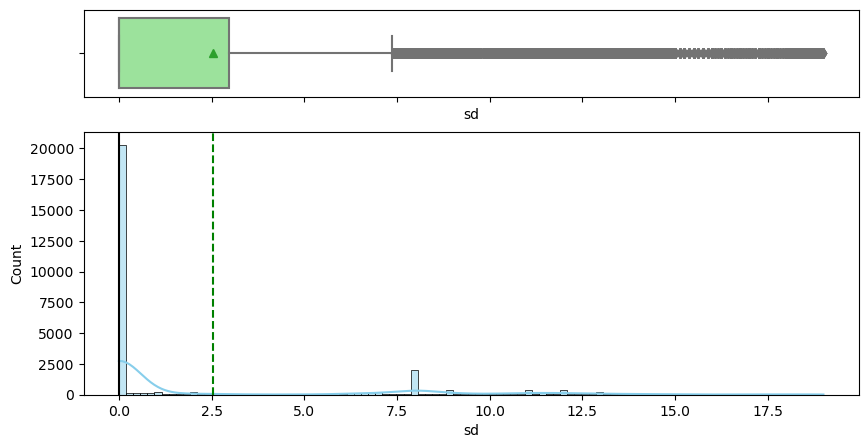

In [40]:
histogram_boxplot(df,'sd')

- *We can observe that there is snowfall in the time period that we are analyzing*
- *There are outliers in this data*
- *We will have to see how snowfall affects pickups. We know that very few people are likely to get out if it is snowing heavily, so our pickups is most likely to decrease when it snows* 

*Categorical Variables*

In [41]:
def plot_count_and_percentage(data, column, figsize=(12, 5)):
    """
    Plots two countplots side by side: one with count labels, one with percentage labels.
    Args:
        data (pd.DataFrame): The DataFrame containing the data.
        column (str): The column to plot.
        figsize (tuple): Figure size for the plots.
    """
    fig, axes = plt.subplots(1, 2, figsize=figsize)
    categories = data[column].value_counts().index
    total = len(data)
    
    # Countplot with count labels
    ax1 = sns.countplot(data=data, x=column, order=categories, ax=axes[0])
    axes[0].set_title('Counts per ' + column)
    axes[0].set_xlabel(column)
    axes[0].set_ylabel('Count')
    axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=90)
    for p in ax1.patches:
        count = int(p.get_height())
        ax1.annotate(str(count), (p.get_x() + p.get_width() / 2, p.get_height()),
                     ha='center', va='bottom', fontsize=10, color='black')
    
    # Countplot with percentage labels
    ax2 = sns.countplot(data=data, x=column, order=categories, ax=axes[1])
    axes[1].set_title('Percentage per ' + column)
    axes[1].set_xlabel(column)
    axes[1].set_ylabel('Percentage')
    axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=90)
    for p in ax2.patches:
        percent = 100 * p.get_height() / total
        ax2.annotate(f'{percent:.1f}%', (p.get_x() + p.get_width() / 2, p.get_height()),
                     ha='center', va='bottom', fontsize=10, color='blue')
    
    plt.tight_layout()
    plt.show()

`hday` Being a holiday (Y) or not (N)

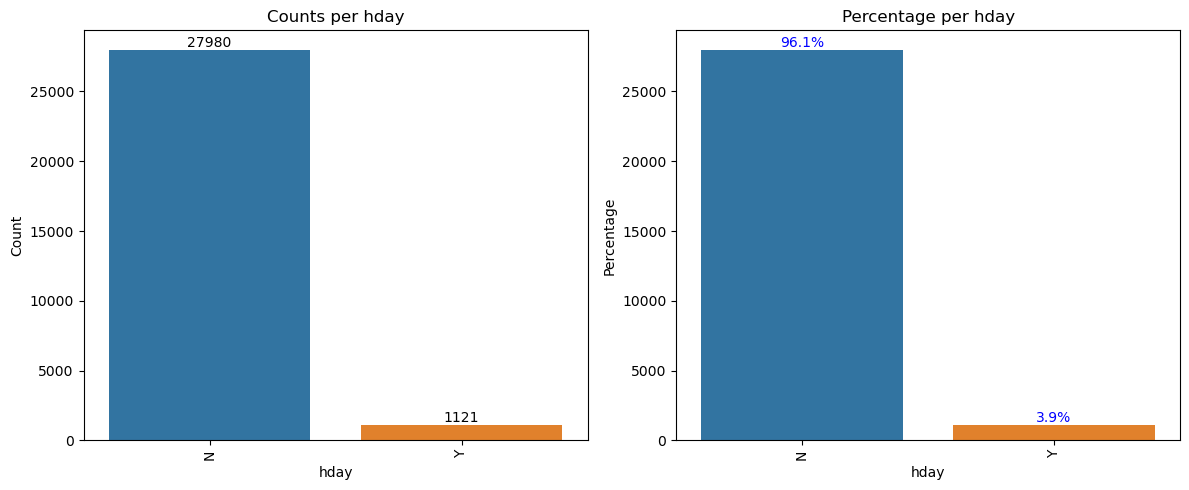

In [42]:
plot_count_and_percentage(df, 'hday')

- *The number of pickups is more on non-holidays than on holidays*

`borough` NYC's borough

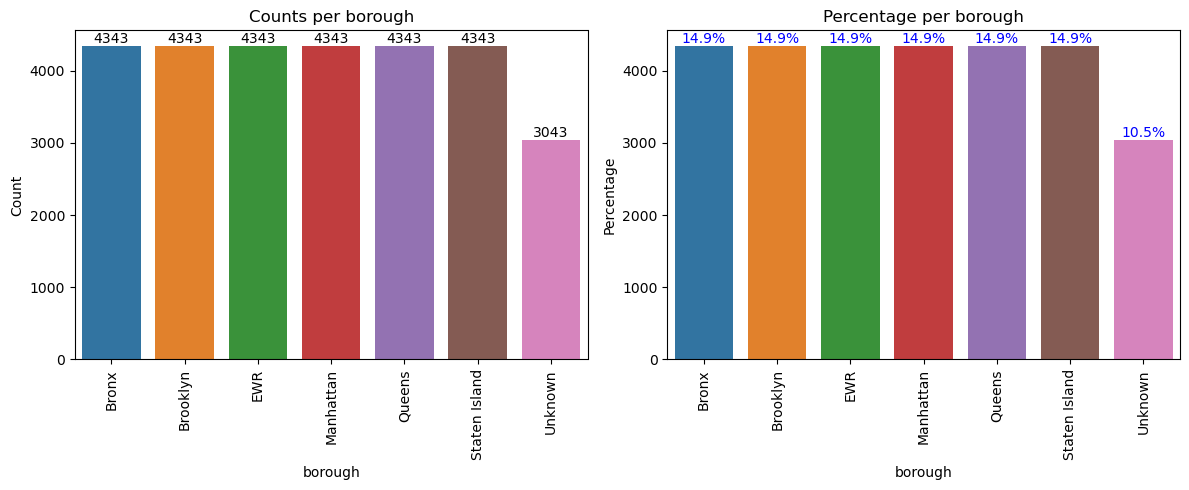

In [43]:
plot_count_and_percentage(df, 'borough')

- *The observations are uniformly distributed across the boroughs except the observations that had NaN values and were attributed to Unknown borough*

### Bivariate Analysis

Bi means two and variate means variable, so here there are two variables. The analysis is related to the relationship between the two variables.

Different types of Bivariate Analysis that can be done:
- Bivariate Analysis of two Numerical Variables
- Bivariate Analysis of two Categorical Variables
- Bivariate Analysis of one Numerical Variables and one Categorical Variable

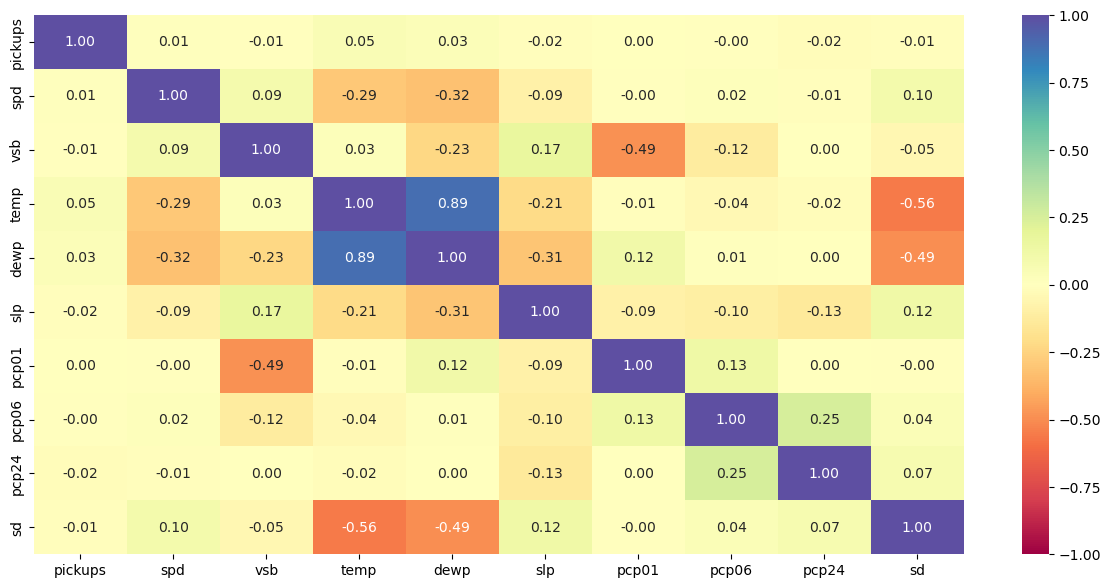

In [44]:
# Check for correlation among numerical variables
num_var = ['pickups','spd','vsb','temp','dewp', 'slp','pcp01', 'pcp06', 'pcp24', 'sd']

corr = df[num_var].corr()

# plot the heatmap

plt.figure(figsize=(15, 7))
sns.heatmap(corr, annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

- *As expected, temperature shows high correlation with dew point*
- *Visibility is negatively correlated with precipitation. If it is raining heavily, then the visibility will be low. This is aligned with our intuitive understanding* 
* *Snow depth of course would be negatively correlated with temperature.*
* *Wind speed and sea level pressure are negatively correlated with temperature* 
* *It is important to note that correlation does not imply causation*
* *There does not seem to be a strong relationship between number of pickups and weather stats* 

#### Bivariate Scatter Plots

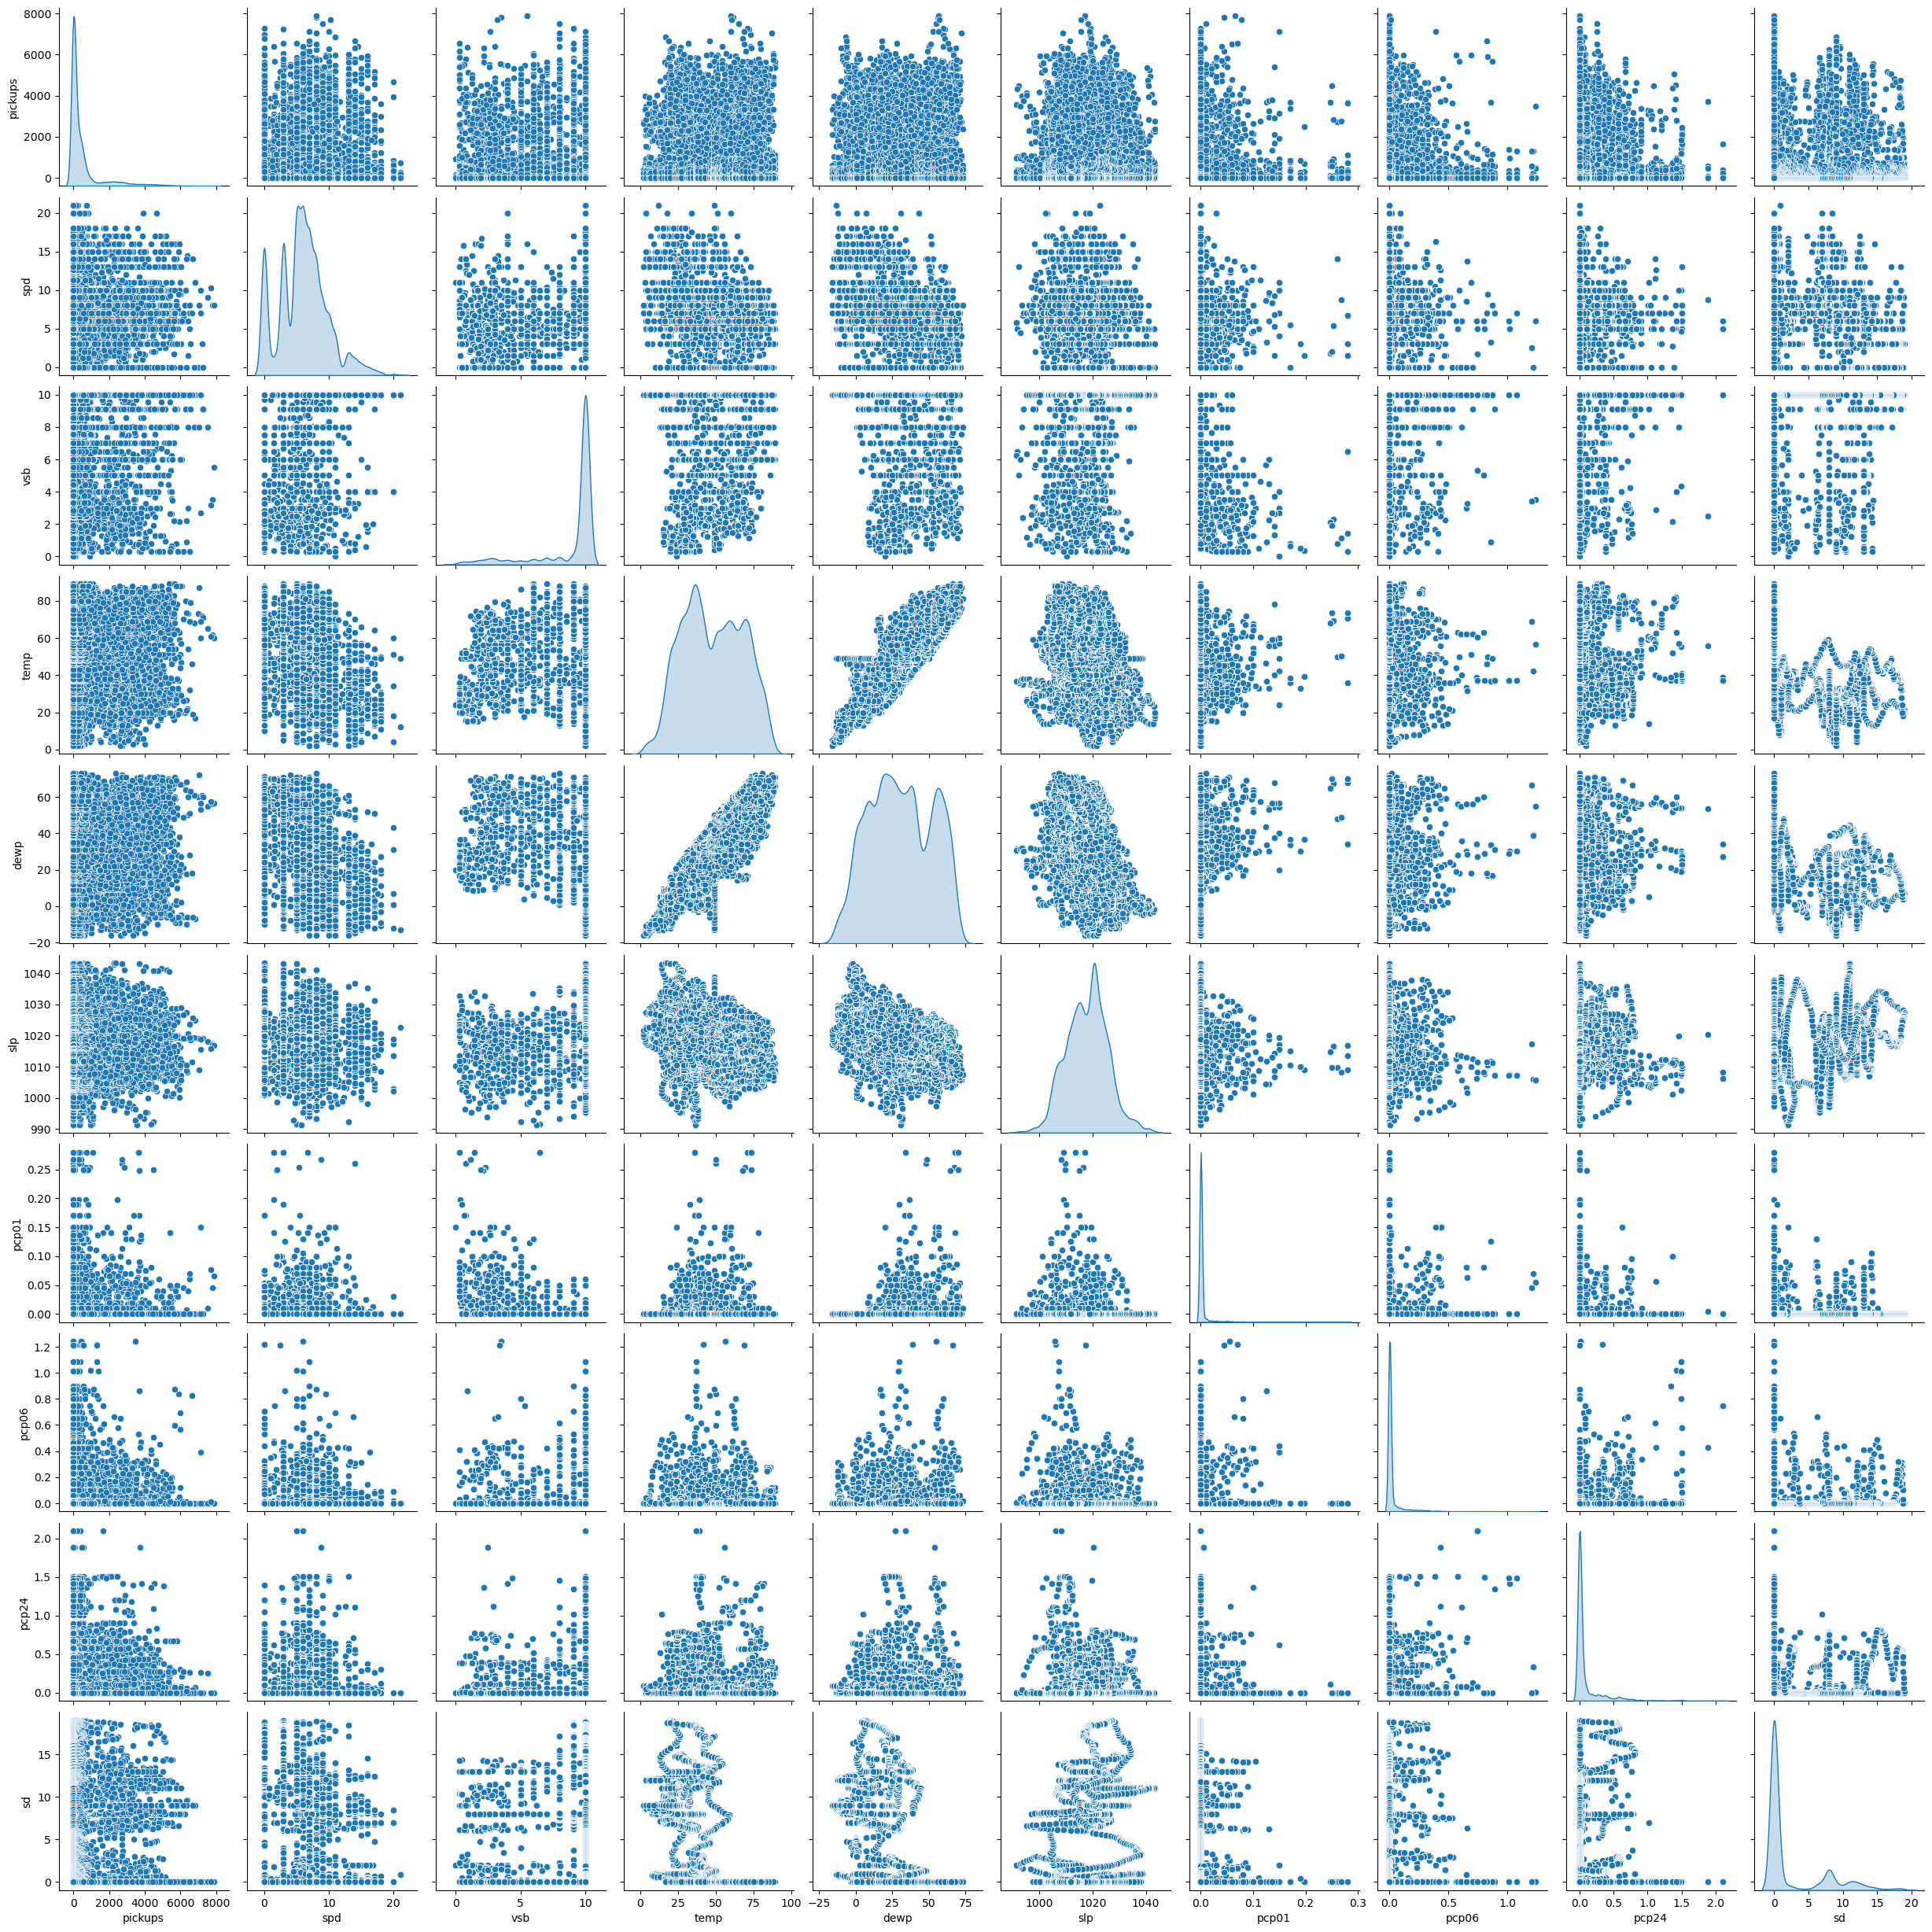

In [45]:
sns.pairplot(data=df[num_var], diag_kind="kde")
plt.show()

- *We get the same insights as from the correlation plot*
- *There does not seem to be a strong relationship between number of pickups and weather stats*

#### Now let's check the trend between pickups across different time based variables

#### Pickups across months

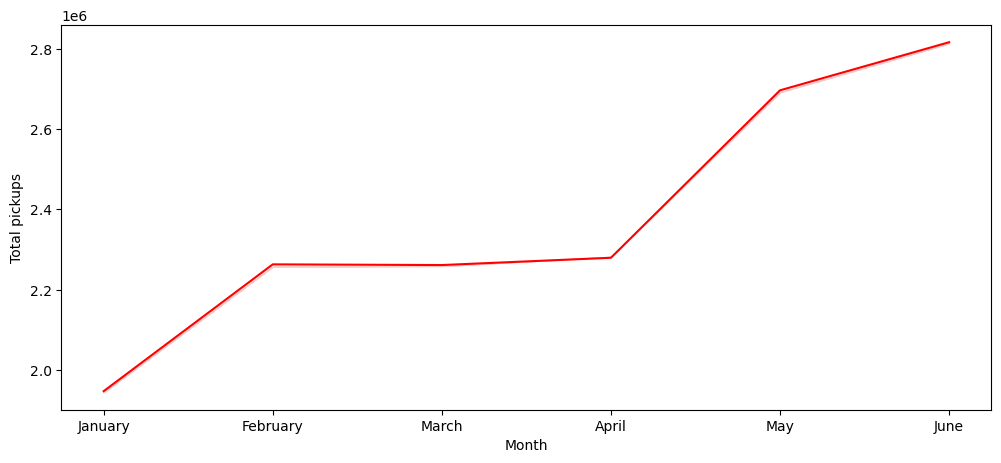

In [46]:
cats = df.MONTH.unique().tolist()
df.MONTH = pd.Categorical(df.MONTH, ordered=True, categories=cats)

plt.figure(figsize=(12,5))
sns.lineplot(data=df, x="MONTH", y="pickups", ci=False, color="red", estimator='sum')
plt.ylabel('Total pickups')
plt.xlabel('Month')
plt.show()

- *There is a clear increasing trend in monthly bookings*
- *The number of pickups in June is almost 2.8 times of that of January*

#### Pickups vs Days of the Month

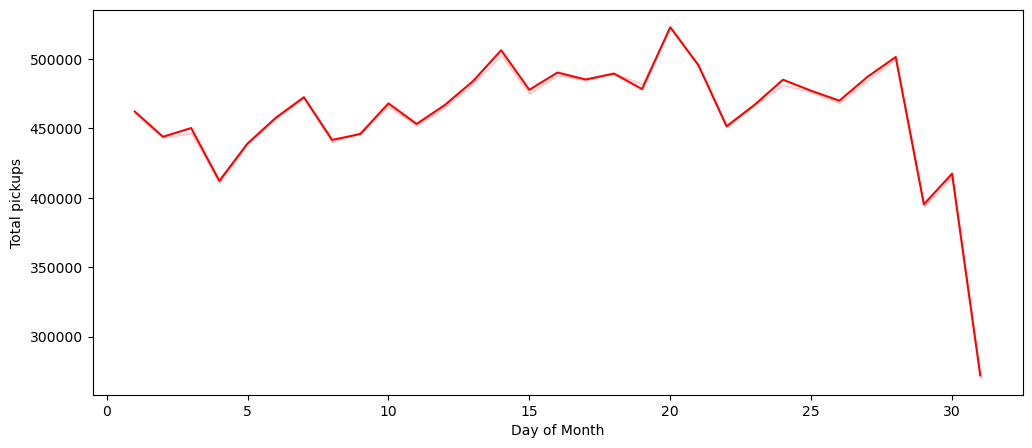

In [47]:
plt.figure(figsize=(12,5))
sns.lineplot(data=df, x="DAY", y="pickups", estimator='sum', ci=False, color="red")
plt.ylabel('Total pickups')
plt.xlabel('Day of Month')
plt.show()

- *There is a steep fall in the number of pickups over the last days of the month*
- *This can partially be attributed to month of Feb having just 28 days. We can drop Feb and have a look at this chart again*
- *There is a peak in the bookings around the 20th day of the month*

*Let us drop the observations for the month of Feb and see the trend*

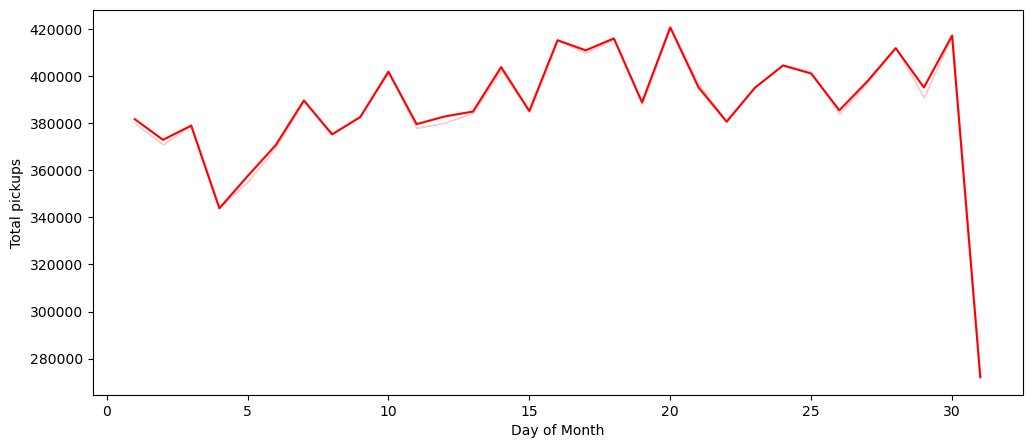

In [48]:
# Let us drop the Feb month and see the trend
df_not_feb =  df[df['MONTH'] != 'February']
plt.figure(figsize=((12,5)))
sns.lineplot(data=df_not_feb, x="DAY", y="pickups", estimator='sum', ci=False, color="red")
plt.ylabel('Total pickups')
plt.xlabel('Day of Month')
plt.show()

- *Number of pickups for 31st is still low because not all months have the 31st day*

#### Pickups across Hours of the Day

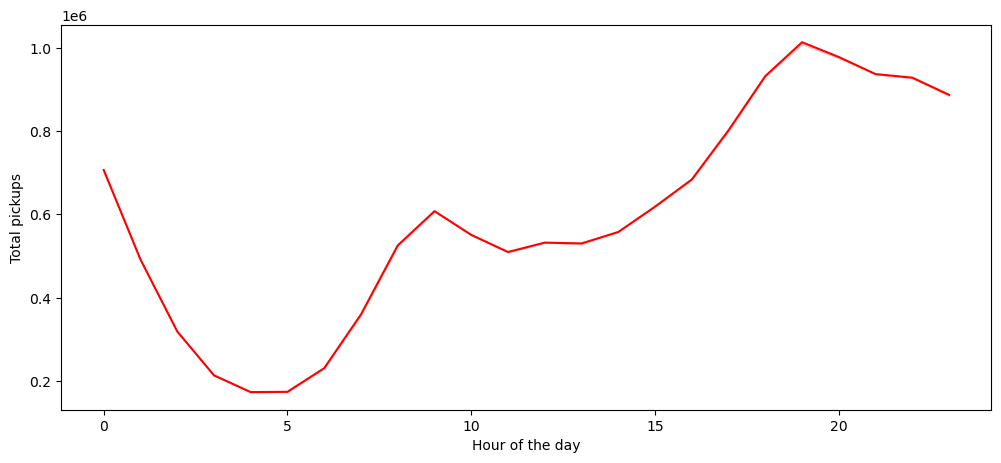

In [49]:
plt.figure(figsize=(12,5))
sns.lineplot(data=df, x="HOUR", y="pickups", estimator='sum', ci=False, color="red")
plt.ylabel('Total pickups')
plt.xlabel('Hour of the day')
plt.show()

- *Bookings peak around the 19th and 20th hour of the day*
- *The peak can be attributed to the time when people leave their workplaces*
- *From 5 AM onwards, we can see an increasing trend till 10, possibly the office rush*
- *Pickups then go down from 10AM to 12PM post which they start increasing*

#### Pickups across Weekdays

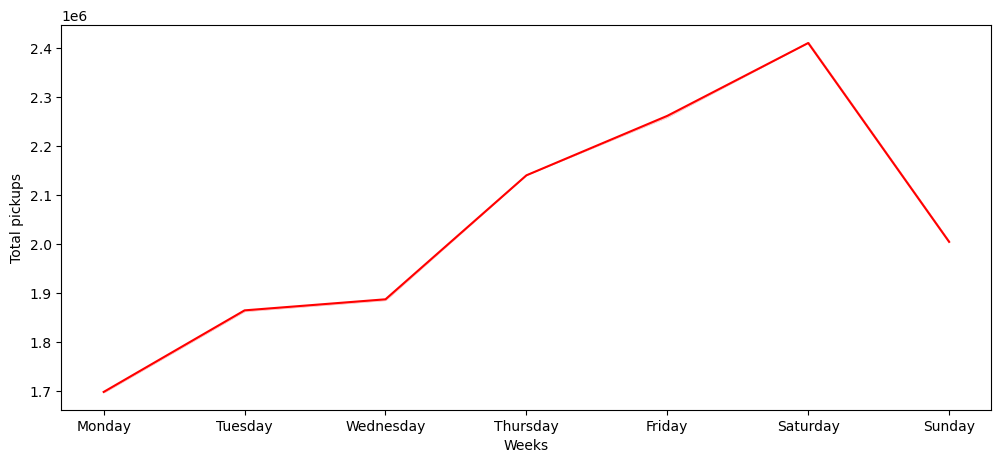

In [50]:
cats = ['Monday', 'Tuesday', 'Wednesday','Thursday', 'Friday', 'Saturday', 'Sunday']
df.WEEKDAY = pd.Categorical(df.WEEKDAY, ordered=True, categories=cats)

plt.figure(figsize=(12,5))
sns.lineplot(data=df, x="WEEKDAY", y="pickups", ci=False, color="red", estimator='sum')
plt.ylabel('Total pickups')
plt.xlabel('Weeks')
plt.show()

- *Pickups gradually increase as the week progresses and starts dropping down after Saturday*
- *We need to do more investigation to understand why demand for Uber is low in the beginning of the week*

Let's check if there is any significant effect of the categorical variables on the number of pickups

#### Pickups across Borough

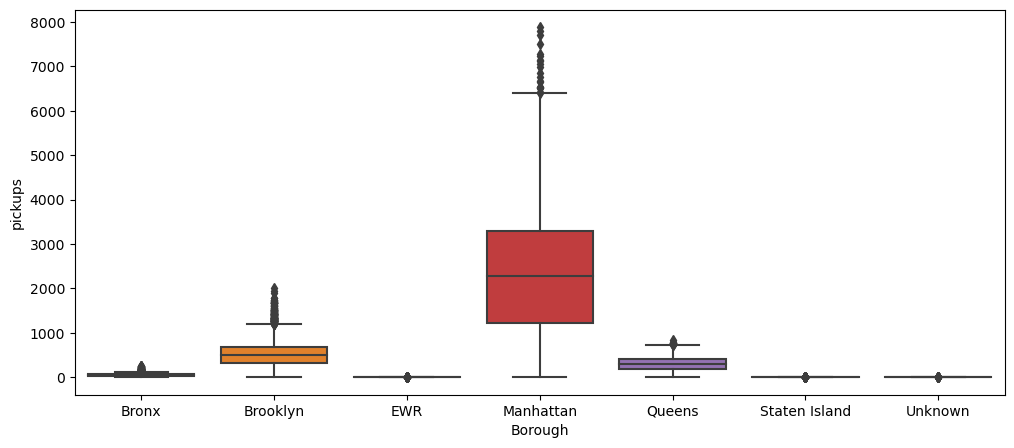

In [51]:
plt.figure(figsize=(12,5))           
sns.boxplot(x=df['borough'], y=df['pickups'])
plt.ylabel('pickups')
plt.xlabel('Borough')
plt.show()

- *There is a clear difference in the number of riders across the different boroughs*
- *Manhattan has the highest number of bookings*
- *Brooklyn and Queens are distant followers*
- *EWR, Unknown and Staten Island have very low number of bookings. The demand is so small that probably it can be covered by the drop-offs of the inbound trips from other areas*

#### Relationship between pickups and holidays

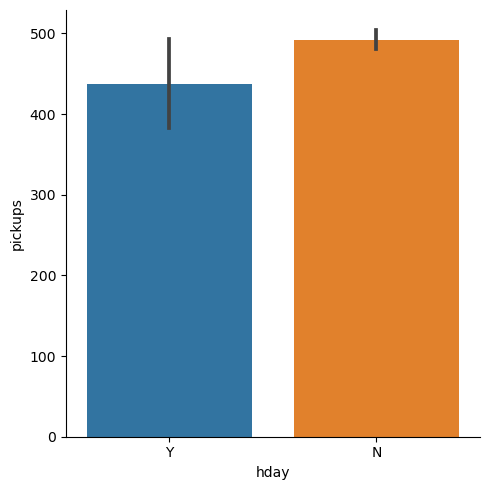

In [52]:
sns.catplot(x='hday', y='pickups', data=df, kind="bar")
plt.show()

- *The mean pickups on a holiday is lesser than that on a non-holiday*

#### Relationship between pickups and Weekday

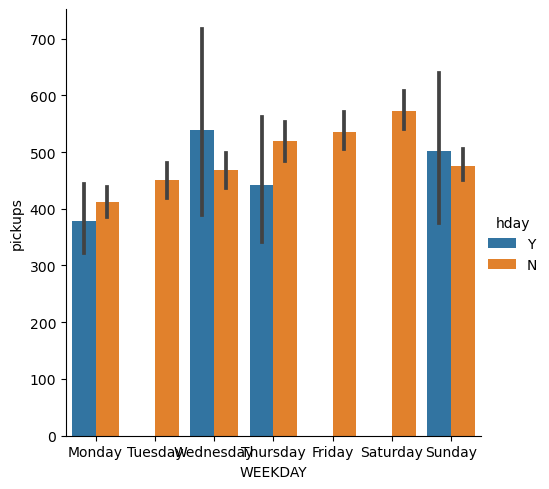

In [53]:
sns.catplot(x='WEEKDAY', y='pickups', data=df, kind="bar",hue='hday')
plt.show()

### Multivariate Analysis

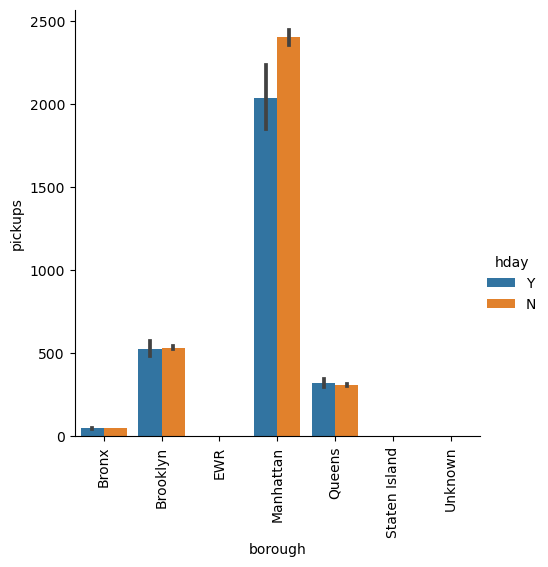

In [54]:
sns.catplot(x='borough', y='pickups', data=df, kind="bar", hue='hday')
plt.xticks(rotation=90)
plt.show()

The bars for EWR, Staten Island and Unknown are not visible. Let's check the mean pickups in all the borough to verify this.

In [55]:
# Check if the trend is similar across boroughs
df.groupby(by = ['borough','hday'])['pickups'].mean()

borough        hday
Bronx          N         50.771073
               Y         48.065868
Brooklyn       N        534.727969
               Y        527.011976
EWR            N          0.023467
               Y          0.041916
Manhattan      N       2401.302921
               Y       2035.928144
Queens         N        308.899904
               Y        320.730539
Staten Island  N          1.606082
               Y          1.497006
Unknown        N          2.057456
               Y          2.050420
Name: pickups, dtype: float64

- *In all the boroughs, except Manhattan, the mean pickups on a holiday is very similar to that on a non holiday*
- *In Queens, mean pickups on a holiday is higher*
- *There are hardly any pickups in EWR*

Since we have seen that borough has a significant effect on the number of pickups, let's check if that effect is present across different hours of the day.

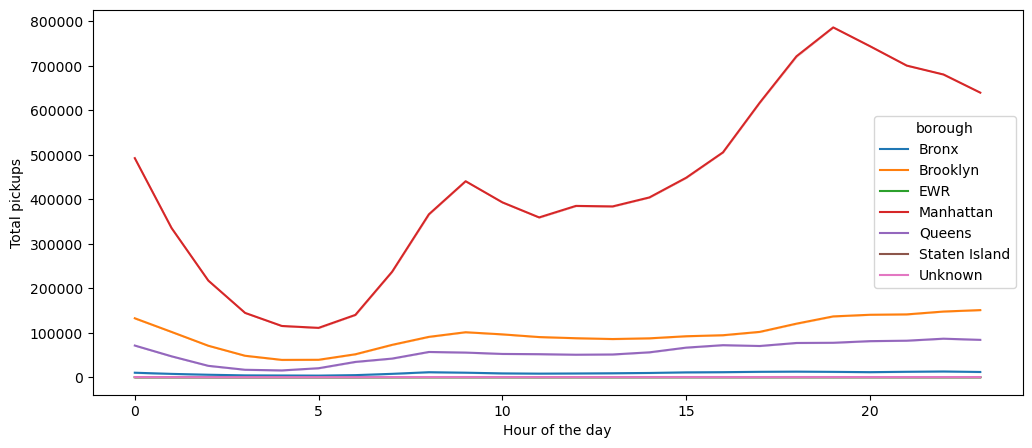

In [56]:
plt.figure(figsize=(12,5))
sns.lineplot(data=df, x="HOUR", y="pickups", hue='borough', estimator='sum', ci=False)
plt.ylabel('Total pickups')
plt.xlabel('Hour of the day')
plt.show()

- *The number of pickups in Manhattan is very high and dominant when we see the spread across boroughs*
- *The hourly trend which we have observed earlier can be mainly attributed to the borough Manhattan, as rest of the other boroughs do not show any significant change for the number of pickups on the hourly basis*

### Outlier Detection and Treatment

Let's visualize all the outliers present in data together

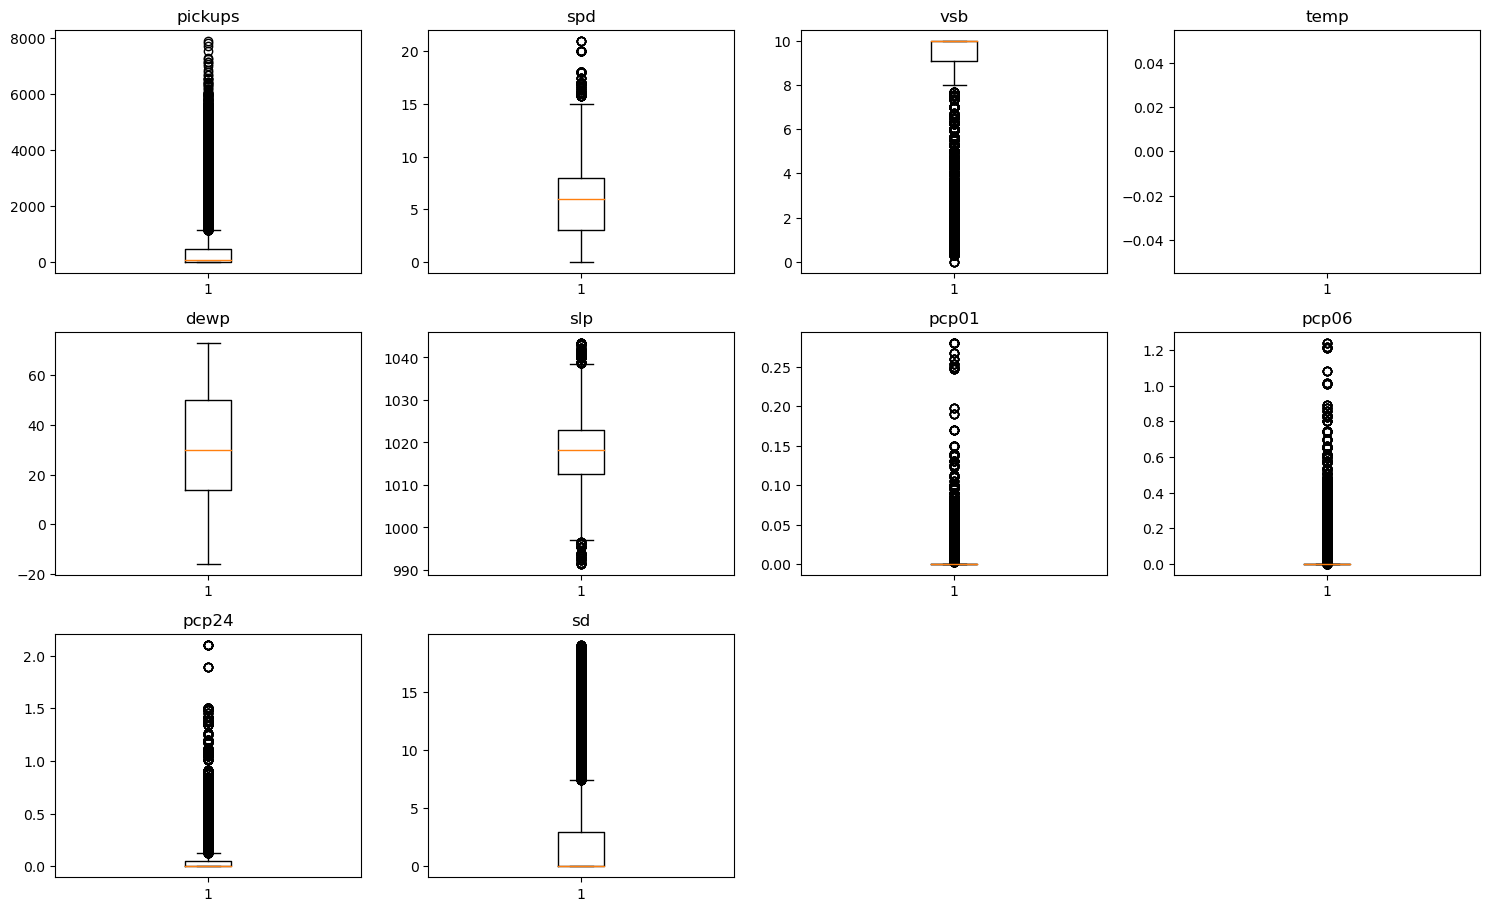

In [57]:
# outlier detection using boxplot
# selecting the numerical columns of data and adding their names in a list 
numeric_columns = ['pickups','spd','vsb','temp','dewp', 'slp','pcp01', 'pcp06', 'pcp24', 'sd']
plt.figure(figsize=(15, 12))

for i, variable in enumerate(numeric_columns):
    plt.subplot(4, 4, i + 1)
    plt.boxplot(data[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

- *The `pickups` column has a wide range of values with lots of outliers. However we are not going to treat this column since the number of pickups can have a varying range and we can miss out on some genuine values if we treat this column*
- *Starting from `spd` to `sd`, all the columns are related to weather. The weather related variables have some outliers, however all of them seem to be genuine values. So we are not going to treat the outliers present in these columns*

### Thank You